<a href="https://colab.research.google.com/github/zjukd00m/SignalsAndSystems/blob/main/Introduction/labs-04-convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sn
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Enable seaborn styling
sn.set()

## Complex Exponential Function

$x(t) = Ce^{at}$

Where _C_ and _a_ are constants.

To get the general complex exponential form we need to express C in the polar form and a in the cartesian form:

$C = |C|e^{j\phi}$

$a = r + j\omega_0$

We get the following expression:

$x(t) = |C|e^{j\phi}e^{rt + j\omega_0{t}}$

The complex terms are grouped:

$x(t) = |C|e^{rt}e^{j(ω_0t + ϕ)}$

Using the Euler identity we get the real and complex terms:

$x(t) = |C|e^{rt}[cos(ω_0t + \phi) + jsin(ω_0t + ϕ)]$

We are interested in the separated components of this complex function:

$Re{x(t)} = |C|e^{rt}cos(ω_0t + ϕ)$

$Im{x(t)} = |C|e^{rt}sin(ω_0t + ϕ)$

As we can see, theres an exponential function that's multiplied by a sinusoidal function. Depending the value of _r_ we get:

* If $r = 0$

$x(t) = |C|cos(ω_0t + ϕ) + j|C|sin(ω_0t + ϕ)$

We have pure sinusoidal functions.

* If $|r| < 1$

$x(t) = |C|e^{rt}[cos(ω_0t + \phi) + jsin(ω_0t + ϕ)]$

A damped sinusoidal function that converges to a value.

* If $|r| >= 1$

$x(t) = |C|e^{-rt}[cos(ω_0t + \phi) + jsin(ω_0t + ϕ)]$

A sinudoidal function that diverges.

In [2]:
def complex_exp(t, omega, phi, C, r):
  real = np.cos(omega*t + phi)
  complex_ = np.sin(omega*t + phi)
  return C*np.exp(r*t) * (real + 1j * complex_)

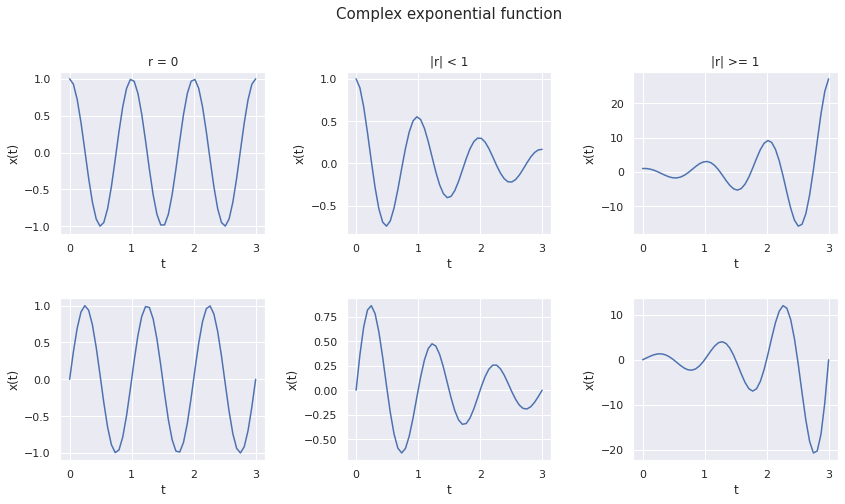

In [15]:
# Frequency [Hz/s]
f = 1

# Angular Frequency [rad/s]
w = 2*np.pi*f

# Fundamental period [s]
T = 1/f

# Phase [rad]
phi = 0

# Time vector with 3 time interval periods
t = np.linspace(0, 3*T)

# When r = 0
cexp_1 = complex_exp(t, omega=w, phi=phi, C=1, r=0)

# When |r| < 1
cexp_2 = complex_exp(t, omega=w, phi=phi, C=1, r=-0.6)

# When |r| >= 1
cexp_3 = complex_exp(t, omega=w, phi=phi, C=1, r=1.1)

# Plotting the graphs
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

fig.suptitle("Complex exponential function", fontsize=15, y=1.1)

# Real functions
axs[0][0].plot(t, np.real(cexp_1))
axs[0][1].plot(t, np.real(cexp_2))
axs[0][2].plot(t, np.real(cexp_3))

axs[1][0].plot(t, np.imag(cexp_1))
axs[1][1].plot(t, np.imag(cexp_2))
axs[1][2].plot(t, np.imag(cexp_3))

axs[0][0].set_title("r = 0")
axs[0][1].set_title("|r| < 1")
axs[0][2].set_title("|r| >= 1")

# Add the axes title to each graph
for ax in axs.flatten():
  ax.set_xlabel("t")
  ax.set_ylabel("x(t)")

# Give padding to the figure to avoid labels overlapping
fig.subplots_adjust(
    top=0.95, 
    bottom=0.05, 
    left=0.05, 
    right=0.95, 
    hspace=0.4, 
    wspace=0.4
)

_ = plt.show()

## Complex Exponential Sequence

$x[n] = z^n$

The general complex exponential sequence can be obtained by expressing the complex number _z_ in the polar form:

$z = |z|e^{jΩ}$

In the original expression:

$x[n] = (|z|e^{j\Omega})^n$

$x[n] = |z|^ne^{jΩn}$

Using the Euler identity:

$x[n] = |z|^n[cos(Ωn) + jsin(Ωn)]$

The real and imaginary components:

$Re\{x[n]\} = |z|^ncos(Ωn)$

$Imag\{x[n]\} = |z|^nsin(Ωn)$

It's an exponential sequence multiplied by a sinusoidal one.

Depending on the value of z we can get different sequence behaviour:




In [4]:
def complex_seq(n, z, Omega):
  return np.power(z, n) * (np.cos(Omega*n) + 1j*np.sin(Omega*n))

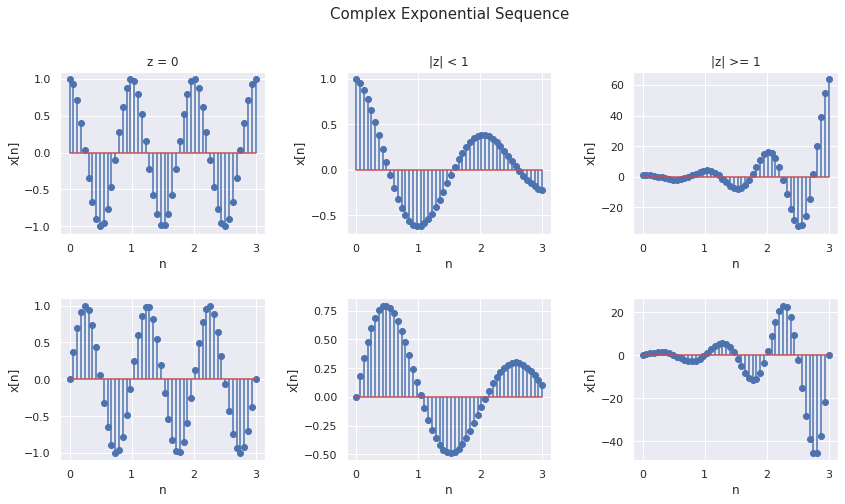

In [23]:
# Frequency [Hz/s]
f = 1

# Angular Frequency [rad/s]
W = 2*np.pi*f

# Fundamental period [s]
N = 1/f

# Phase [rad]
phi = 0

# Time vector with 3 time interval periods
n = np.linspace(0, 3*N)

# When n = 0
cexp_1 = complex_seq(t, Omega=W, z=1)

# When |n| < 1
cexp_2 = complex_seq(t, Omega=3, z=0.2*np.pi)

# When |n| >= 1
cexp_3 = complex_seq(t, Omega=W, z=4)

# Plotting the graphs
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

fig.suptitle("Complex Exponential Sequence", fontsize=15, y=1.1)

# Real functions
axs[0][0].stem(t, np.real(cexp_1))
axs[0][1].stem(t, np.real(cexp_2))
axs[0][2].stem(t, np.real(cexp_3))

axs[1][0].stem(t, np.imag(cexp_1))
axs[1][1].stem(t, np.imag(cexp_2))
axs[1][2].stem(t, np.imag(cexp_3))

axs[0][0].set_title("z = 0")
axs[0][1].set_title("|z| < 1")
axs[0][2].set_title("|z| >= 1")

# Add the axes title to each graph
for ax in axs.flatten():
  ax.set_xlabel("n")
  ax.set_ylabel("x[n]")

# Give padding to the figure to avoid labels overlapping
fig.subplots_adjust(
    top=0.95, 
    bottom=0.05, 
    left=0.05, 
    right=0.95, 
    hspace=0.4, 
    wspace=0.4
)

_ = plt.show()

## Unit impulse and unit step

To reach to the convolution we only have to discuss two classes of signals that are important in the analysis of a system:

- Unit impulse
- Unit step

This kind of functions are also called (_singulatity functions_).





In [6]:
# Time vector
n = np.arange(0, 10)

In [7]:
def unit_impulse(n, k):
  xn = np.zeros_like(n)
  for n in range(n.shape[0]):
    if n == k:
      xn[n] = 1
    else:
      xn[0] = 0
  return xn

In [8]:
def unit_step(n, k):
  xn = np.zeros_like(n)
  for n in range(n.shape[0]):
    if n < k:
      xn[n] = 0
    else:
      xn[n] = 1
  return xn

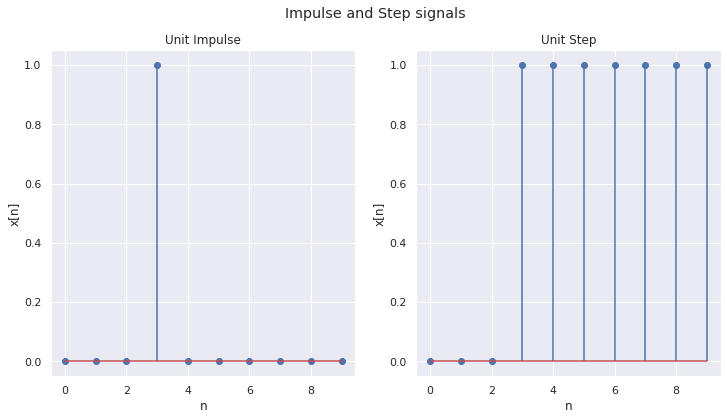

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("Impulse and Step signals")

impulse = unit_impulse(n, k=3)
step = unit_step(n, k=3)

axs[0].stem(n, impulse)
axs[1].stem(n, step)

axs[0].set_title("Unit Impulse")
axs[1].set_title("Unit Step")

# Add the axes title to each graph
for ax in axs.flatten():
  ax.set_xlabel("n")
  ax.set_ylabel("x[n]")

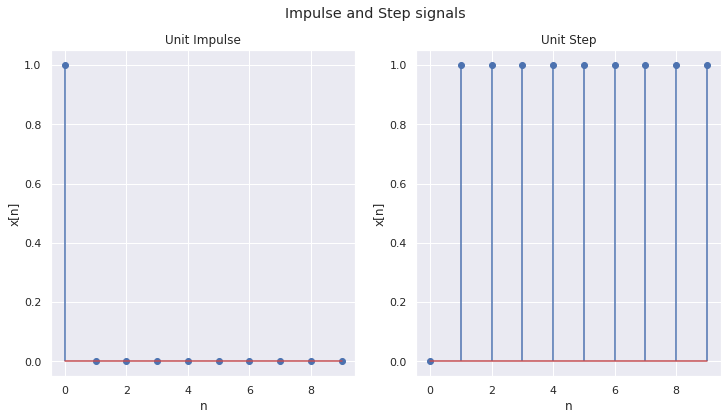

In [10]:
# Find the:
# - impulse as the first difference of the step signal
# - step as the sum of the impulse signal
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("Impulse and Step signals")

# Impulse as the first difference
impulse = unit_step(n, k=0) - unit_step(n, k=1)

# Step as the summation
step = np.zeros_like(n)
for k in range(n.shape[0]):
  step += unit_impulse(n, k)

# Charts
axs[0].stem(n, impulse)
axs[1].stem(n, step)

axs[0].set_title("Unit Impulse")
axs[1].set_title("Unit Step")

# Add the axes title to each graph
for ax in axs.flatten():
  ax.set_xlabel("n")
  ax.set_ylabel("x[n]")

## Systems

In general a system can be defined as the interconection of smaller components to create a bigger and complex one.

For each small component called subsystem an input is processed to produce an output. We are interested in finding the underlying relationship between the input and the output.

There are many kinds of systems, some of them are represented in the following table:

Name                  | Description
----------------------|--------------------------------------------------------
LTI systems           | Linear Time-Invariant systems are systems that have properties of linearity and time-invariance.
FIR systems           | Finite Impulse Response systems are systems whose impulse response is of finite duration.
IIR systems           | Infinite Impulse Response systems are systems whose impulse response is of infinite duration.
Nonlinear systems     | Nonlinear systems are systems whose output is not directly proportional to the input.
Time-varying systems  | Time-varying systems are systems whose properties change over time.
Time-invariant systems| Time-invariant systems are systems whose properties do not change over time.
Continuous-time systems| Continuous-time systems are systems whose input and output signals are continuous functions of time.
Discrete-time systems | Discrete-time systems are systems whose input and output signals are discrete functions of time.
Causal systems        | Causal systems are systems whose output depends only on past and present input values.
Non-causal systems    | Non-causal systems are systems whose output depends on future input values.
Stable systems        | Stable systems are systems whose output does not grow unbounded for bounded input signals.
Unstable systems      | Unstable systems are systems whose output can grow unbounded for bounded input signals.

### Input output relationship

A system may be viewed as a "black box" or a process that is applied to a continuous time input signal $x(t)$ or a discrete time signal $x[n]$ to produce an output $y(t)$ or $y[n]$.

$x → y$

The system is represented as a transformation of the input signal:

$y = T\{x\}$

We will see how the __convolution__ is the key to get the mathematical relationship between the input and output signals but there's a particular kind of system we are interested in from all the listed in the table.

## Linear Time Invariant Systems

This is the subclass of systems we are interested in since most of the physical systems in nature behave in a lineary and time invariant way:

__Linearity__

The response of the sum of input signals is the sum of the individual responses of each signal.

$x = x_2 + x2$

$y = y_{x_1} + y_{x_2} $

__Homogeneity__

The response of a scalar multiplying an input signal is the scalar times the system's response to that input signal.

$x = \alpha x$

$y = \alpha y_x$

If the input signal is a sum of weighted signals:

$x[n] = \alpha_0x_0[n] + \alpha_1x_1[n] + ... + \alpha_nx_n[n] $

Then the output is (by using the linearity and homogeneity properties):

$y[n] = \alpha_0y_0 + \alpha_1y_1 + ... + \alpha_ny_n$

Which can be expressed as:

$x[n] = \sum{k=0}^n{\alpha_kx_k[n]}$

$y[n] = \sum_{k=0}^n{\alpha_ky_k[n]}$

__Examples__

- Linear system:
> $y(t) = \frac{dx(t)}{dt}$

- Non Linear system:
> $y(t) = x^2(t)$

## Convolution and LTI Systems
The linearity and time invariance properties of a system, along with the ability to express any signal as a sum of weighted and delayed impulses, allow us to analyze the response of a linear time-invariant (LTI) system to any input signal.

Given an input signal that is a sum of impulses:

$x[n] = \sum_{k=0}^n x[k] \delta[n-k]$

If we input a scaled impulse signal into the system, the output is known as the impulse response and is denoted by $h[n]$.

Knowing the impulse response of a system, we can calculate the output signal as:

$y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$

This summation is known as the convolution sum.

Properties
Commutative:

$x[n] * h[n] = h[n] * x[n] = \sum_{k=-\infty}^{\infty} h[k] x[n-k]$

Associative:

$x[n] * (h[n] * w[n]) = (x[n] * h[n]) * w[n]$

Time-invariant:

If $y[n] = x[n]*h[n]$, then $y[n-k] = x[n-k]*h[n-k]$ for any integer $k$.

Distributive with addition:

$x[n]*(h[n]+w[n]) = x[n]*h[n] + x[n]*w[n]$

Distributive with scalar multiplication:

$α(x[n]*h[n]) = (αx[n])*h[n] = x[n]*(αh[n])$


In [11]:
def convolve(xn, wn):
  yn_size = xn.shape[0] + wn.shape[0] - 1
  yn = np.zeros(yn_size)
  
  # Flip the kernel
  xn = np.pad(xn, (yn_size - xn.shape[0], 0), mode="constant")
  kernel = wn[::-1]

  # For every n get the convolution sum
  for n in range(yn_size):
    for k in range(kernel.shape[0]):
      yn[n] += kernel[k] * xn[n - k]
  
  return yn

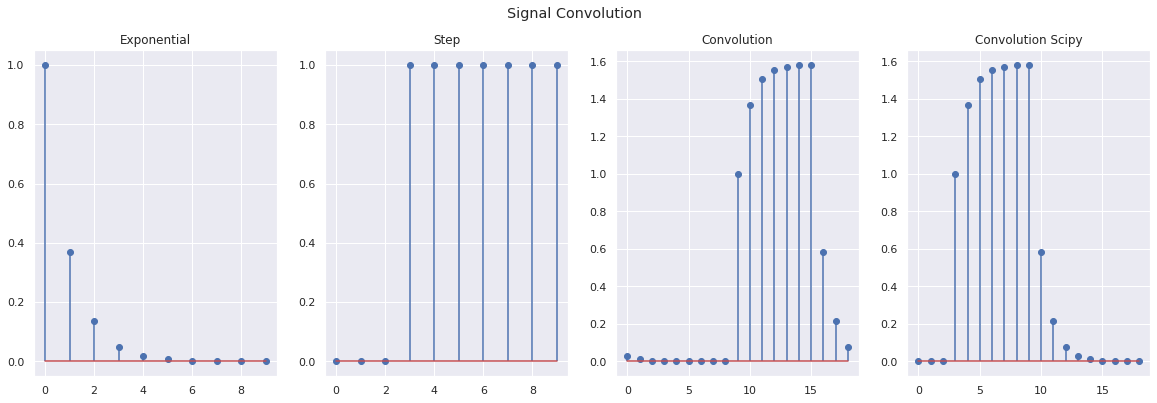

In [12]:
xn = np.exp(-n)
wn = unit_step(n, k=3)

yn = convolve(xn, wn)
kn = sp.signal.convolve(xn, wn, mode="full")

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

fig.suptitle("Signal Convolution")

axs[0].stem(n, xn)
axs[1].stem(n, wn)
axs[2].stem(np.arange(yn.shape[0]), yn)
axs[3].stem(np.arange(kn.shape[0]), kn)

# Set the titles
axs[0].set_title("Exponential")
axs[1].set_title("Step")
axs[2].set_title("Convolution")
axs[3].set_title("Convolution Scipy")

_ = fig.show()